# Kinetics: fundamental concepts

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

Kinetics is the branch of classical mechanics that is concerned with the relationship between the motion of bodies and its causes, namely forces and torques ([Encyclopædia Britannica Online](https://www.britannica.com/science/kinetics)).  
Kinetics, as used in Biomechanics, also includes the study of statics, the study of equilibrium and its relation to forces and torques (one can treat equilibrium as a special case of motion, where the velocity is zero). This is different than the nowadays most common ramification of Mechanics in Statics and Dynamics, and Dynamics in Kinematics and Kinetics ([Introduction to Biomechanics](http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/Biomechanics.ipynb#On-the-branches-of-Mechanics-and-Biomechanics-I)).

## The development of the laws of motion of bodies 

"The theoretical development of the laws of motion of bodies is a problem of such interest and importance that it has engaged the attention of all the most eminent mathematicians since the invention of dynamics as a mathematical science by Galileo, and especially since the wonderful extension which was given to that science by Newton."

"Among the successors of those illustrious men, Lagrange has perhaps done more than any other analyst to give extent and harmony to such deductive researches, by showing that the most varied consequences respecting the motions of systems of bodies may be derived from one radical formula; the beauty of the methods so suiting the dignity of the results as to make of his great work a kind of scientific poem."  

&#8212;Hamilton, 1834 (apud Taylor, 2005).

## Newton's laws of motion

The Newton's laws of motion describe the relationship between the forces acting on a body and the resultant linear motion due to those forces:

- **First law**: An object will remain at rest or in uniform motion in a straight line unless an external force acts on the body.
- **Second law**: The acceleration of an object is directly proportional to the net force acting on the object and inversely proportional to the mass of the object: $\mathbf{F} = m\mathbf{a}.$
- **Third law**: Whenever an object exerts a force $\mathbf{F}_1$ (action) on a second object, this second object simultaneously exerts a force $\mathbf{F}_2$ on the first object with the same magnitude but opposite direction (reaction): $\mathbf{F}_2 = −\mathbf{F}_1.$

These three statements are astonishing in their simplicity and how much of knowledge they empower.   
Isaac Newton was born in 1943 and his works that resulted in these equations and other discoveries were mostly done in the years of 1666 and 1667, when he was only 24 years old!   
However, these works were only published in 1687, twenty years later. So, if your adviser is pressing you to publish your work, you can tell her or him that even Newton took 20 years to publish! But be prepared if your adviser warns you that your work might not be of that level...

Here are these three laws in Newton's own words (from page 83 of Book I in the first American edition of the [*Philosophiæ Naturalis Principia Mathematica*](http://archive.org/details/newtonspmathema00newtrich):

> LAW I.    
> *Every body perseveres in its state of rest, or of uniform motion in a right line, unless it is compelled to change that state by forces impressed thereon.*   
> LAW II.    
> *The alteration of motion is ever proportional to the motive force impressed; and is made in the direction of the right line in which that force is impressed.*   
> LAW III.   
> *To every action there is always opposed an equal reaction: or the mutual actions of two bodies upon each other are always equal, and directed to contrary parts.*   

And Newton carefully defined mass, motion, and force in the first page of the book I (page 73 of the [*Principia*](http://archive.org/details/newtonspmathema00newtrich)):  

> DEFINITION I.   
> *The quantity of matter is the measure of the same, arising from its density and bulk conjunctly.*   
> ...It is this quantity that I mean hereafter everywhere under the name of body or mass.   
> DEFINITION II.   
> *The quantity of motion is the measure of the same, arising from the velocity and quantity of matter conjunctly.*    
> The motion of the whole is the sum of the motions of all the parts; and therefore in a body double in quantity, with equal velocity, the motion is double; with twice the velocity, it is quadruple.   
> DEFINITION IV.   
> *An impressed force is an action exerted upon a body, in order to change its state, either of rest, or of moving uniformly forward in a right line.*

## Linear momentum

From Definition II above, we can see that Newton defined as motion what we know today as linear momentum, the product between mass and velocity:

$$ \mathbf{p} = m\mathbf{v} $$

So, in his second law, *alteration of motion is ever proportional to the motive force impressed*, if we understand that it was implicit that the *alteration* occurs in a certain time (or we can understand *force impressed* as force during a certain  time), Newton actually stated:

$$ \mathbf{F} = \frac{\Delta\mathbf{p}}{\Delta t} \;\;\;\;\;\; \text{or}\;\;\;\;\;\; \mathbf{F}\Delta t = \Delta\mathbf{p}$$

What is equivalent to $\mathbf{F}=m\mathbf{a}\; $ if mass is constant.
$$ \mathbf{i} = \int_t \mathbf{F}(t)dt $$

The concept of impulse due to a force that varies with time is often applied in biomechanics because it is common to measure forces (for example, with force plates) during human movement. When such varying force is measured, the impulse can be calculated as the area under the force-versus-time curve:

## Impulse

The mechanical linear impulse is a related concept and it can be derived from the second law of motion:

$$ \mathbf{i} = \mathbf{F}\Delta t = m\Delta\mathbf{v} $$

And if the force varies with time:

$$ \mathbf{i} = \sum_t \mathbf{F}(t)\Delta t $$

or using [infinitesimal calculus](http://en.wikipedia.org/wiki/Infinitesimal_calculus) (that it was independently developed by Newton himself and Leibniz):

In [1]:
# Import the necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

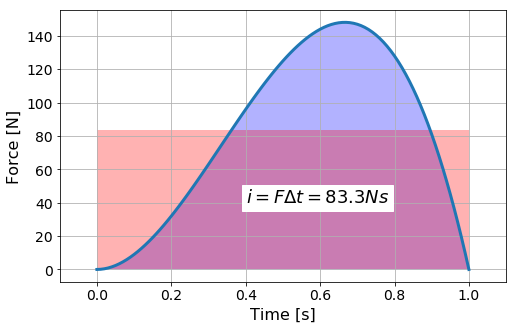

In [2]:
# simulate some data:
t = np.arange(0, 1.01, 0.01)
f = 1000*(-t**3+t**2)
# plot:
plt.rc('axes',  labelsize=16) 
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
hfig, hax = plt.subplots(1,1, figsize=(8,5))
hax.plot(t, f, linewidth=3)
hax.set_xlim(-.1, 1.1)
hax.grid()
hax.set_ylabel('Force [N]')
hax.set_xlabel('Time [s]')
plt.fill(t, f, 'b', alpha=0.3)
# area (impulse) with the trapz numerical integration method:
from scipy.integrate import trapz
imp = trapz(f, t)
# plot a rectangle for the mean impulse value:
plt.fill(np.array([t[0], t[0], t[-1], t[-1]]),
         np.array([0, imp, imp, 0]/(t[-1]-t[0])), 'r', alpha=0.3)
s = '$i=F\Delta t = %.1f Ns$'%imp 
plt.text(.4, 40, s, fontsize=18,
         bbox=dict(facecolor='white', edgecolor='white'));

The plot above shows the area (impulse) of the force-versus-time curve (blue) and the equivalent rectangle area for the mean force (red) with the same impulse value.

## Force

There are many manifestations of force we may experience during movement: gravitational, friction, ground reaction force, muscle force, buoyancy, elastic force, and other less visible such as electromagnetic, nuclear, etc. But in reality, all these different forces can be grouped in only four fundamental forces:

- Strong force: hold the nucleus of an atom together. Range of action is $10^{-15}$ m. 
- Weak force: force acting between particles of the nucleus. Range of action is $10^{-18}$ m.
- Electromagnetic force: forces between electrical charges and the magnetic forces.
- Gravity force: forces between masses; is the weakest of the four fundamental forces.

In mechanics, forces can be classified as either contact or body forces. The contact force acts at the point of contact between two bodies. The body force acts on the entire body with no contact (e.g., gravity and electromagnetic forces).   
In biomechanics, another useful classification is to divide the forces in either external or internal in relation to the human body. External forces result from interactions with an external body or environment (e.g., gravity and ground reaction forces). Internal forces result from interactions inside the body (e.g., the forces between bones).

### Gravity force

The gravitational force between two masses $m_1$ and $m_2$ is given by:

$$ \mathbf{F} = -G\frac{m_1\:m_2}{r_{1-2}^2}\mathbf{\hat{r}}  $$ 

Where $G = 6.67.10^{\:-11} Nm^2/kg^2$.  
The minus sign means is an attractive force in the direction of the radius connecting the two bodies.   
At the surface of the Earth, $m_1 = 5.9736\times10\:^{24}\:kg\;\;\text{and}\;\;r_{1-2} = 6.371\times10\:^6\:m$.

$$ \mathbf{F} = -mg $$

Where $g \approx 9.8 m/s^2\;$ in the vertical direction and points downwards due to the minus sign.

If the only force acting on the body is the gravity force, using the second law of motion, the equation of movement for the body is:

$$ \mathbf{F} = m\mathbf{a} $$

$$ -mg = ma $$

$$ a = -g $$

$$ r(t) = -\int_t dt' \int_t g\:dt $$

$$ r(t) = r_0 + v_0t - \frac{gt^2}{2} $$

### Elastic force

The force of a spring is proportional to its deformation, x:

$$ \mathbf{F} = -Kx $$

Where K is a constant characteristic of the spring known as stiffness.   
The minus sign means that it is a restoring force and the spring acts to restore the body to the resting position of the spring (no deformation).

If the only force acting on the body is the spring force, using the second law of motion, the equation of movement for the body is:

$$ \mathbf{F} = m\mathbf{a} $$

$$ -Kx = ma $$

$$ a = -\frac{K}{m}x $$

$$ x(t) = -\int_t dt' \int_t Kx\:dt $$

$$ x(t) = A_0\cos(\omega t + \phi) $$

Where $A_0$ is the maximum amplitude of deformation on the spring, $\phi$ is a phase, and $\omega$ is the angular frequency of this oscillatory system:   
 
$$ \omega = \sqrt{\frac{K}{m}} \;\;\; \text{and} \;\;\; \omega = 2\pi f $$

## Work

The mechanical work of a force done on a body is the product between the component of the force in the direction of the resultant motion and the displacement: 

$$ \tau = \mathbf{F} \cdot \Delta\mathbf{x} $$

Where the symbol $\cdot$ stands for the [scalar product](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/ScalarVector.ipynb) mathematical function.

Mechanical work can also be understood as the amount of mechanical energy transferred into or out of a system.

## Mechanical energy

Mechanical energy is the sum of kinetic and potential energies.

### Kinetic energy

$$ E_k = \frac{1}{2}mv^2 $$

The linear momentum and the kinetic energy are related by:

$$ \mathbf{p} = \frac{\partial E_k}{\partial\mathbf{v}} $$

### Potential energy

The potential energy due to the gravitational force at the Earth's surface is:

$$ E_p = mgh $$

The potential energy stored in a spring is:

$$ E_p = \frac{1}{2}Kx^2 $$

### Power 
 
$$ P = \frac{\Delta E}{\Delta t} \quad \text{and} \quad P = \mathbf{F}\mathbf{v} $$

## Angular momentum

In analogy to the linear momentum, the angular momentum is the quantity of movement of a particle rotating around an axis at a distance $\mathbf{r}:$

$$ \mathbf{L} = \mathbf{r} \times \mathbf{p} $$

For a rigid body rotating around a fixed axis of symmetry, the angular momentum can be expressed as:

$$ \mathbf{L} = I\mathbf{\omega} $$

Where $I$ is the rotational inertia or moment of inertia of the body.

For a rigid body rotating around its own center of mass and also rotating around another axis, the total angular momentum is the sum of the two angular momenta  around each axis:   

$$ \mathbf{L} = \mathbf{r_{cm}} \times \mathbf{p_{cm}} + I \mathbf{\omega} $$

## Torque (moment of force)

In analogy to the second Newton's law for the linear case, torque or moment of force (or simply moment) is the time derivative of angular momentum:

$$ \mathbf{M} = \frac{d\mathbf{L}}{dt} = \frac{d}{dt}(\mathbf{\mathbf{r} \times \mathbf{p}}) = \frac{d\mathbf{r}}{dt} \times \mathbf{p} + \mathbf{r} \times \frac{d\mathbf{p}}{dt} = 0 + \mathbf{r} \times \mathbf{F} $$

$$ \mathbf{M} = \mathbf{r} \times \mathbf{F} $$

$$ \mathbf{M} = (r_x\:\mathbf{\hat{i}}+r_y\:\mathbf{\hat{j}}+r_z\:\mathbf{\hat{k}}) \times  (F_x\:\mathbf{\hat{i}}+F_y\:\mathbf{\hat{j}}+F_z\:\mathbf{\hat{k}}) $$

Where the symbol $\times$ stands for the [cross product](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/ScalarVector.ipynb) mathematical function.   
The moment of force can be calculated as the determinant of the following matrix:

$$ \mathbf{M} = \begin{bmatrix}
\mathbf{\hat{i}} & \mathbf{\hat{j}} & \mathbf{\hat{k}} \\ 
r_x & r_y & r_z \\
F_x & F_y & F_z 
\end{bmatrix} $$

$$ \mathbf{M} = (r_yF_z-r_zF_y)\mathbf{\hat{i}}+(r_zF_x-r_xF_z)\mathbf{\hat{j}}+(r_xF_y-r_yF_x)\mathbf{\hat{k}} $$

The moment of force can also be calculated by the geometric equivalent formula:

$$ \mathbf{M} = \mathbf{r} \times \mathbf{F} = ||\mathbf{r}||\:||\mathbf{F}||\:sin(\theta) $$

Where $\theta$ is the angle between the vectors $\mathbf{r}$ and $\mathbf{F}$. 

The animation below (from [Wikipedia](http://en.wikipedia.org/wiki/File:Torque_animation.gif)) illustrates the relationship between force ($\mathbf{F}$), torque ($\tau$), and momentum vectors ($\mathbf{p}$ and $\mathbf{L}$):   

<figure><img src="http://upload.wikimedia.org/wikipedia/commons/0/09/Torque_animation.gif" alt="Torque animation" width="300"/><figcaption><center><i>Figure. Relationship between force ($\mathbf{F}$), torque ($\tau$), and momentum vectors ($\mathbf{p}$ and $\mathbf{L}$) (from [Wikipedia](http://en.wikipedia.org/wiki/File:Torque_animation.gif)).</i></center></figcaption></figure>

### Varignon's Theorem (Principle of Moments)

> *The moment of a force about a point is equal to the sum of moments of the components of the force about the same point.*   
Note that the components of the force don't need to be orthogonal.

### Principle of transmissibility

> *For rigid bodies with no deformation, an external force can be applied at any point on its line of action without changing the resultant effect of the force.*

**Example** (From Meriam 1997). For the figure below, calculate the magnitude of the moment about the base point *O* of the 600-N force in five different ways[.](http://ebm.ufabc.edu.br/wp-content/uploads/2013/02/torque.png)

<figure><img src="http://ebm.ufabc.edu.br/wp-content/uploads/2013/02/torque2.jpg" alt="Torque" width="250"/><figcaption><center><i>Figure. Can you calculate the torque of the force above by five different ways?</i></center></figcaption></figure>

One way:

In [12]:
r = [2, 4, 0]  # in m
F = [600*np.cos(40*np.pi/180), -600*np.sin(40*np.pi/180), 0]  # in N
M = np.cross(r, F)  # in Nm
print('The magnitude of the moment of force is: {:.0f} Nm'.format(np.linalg.norm(M)))

The magnitude of the moment of force is: 2610 Nm


## Euler's laws of motion (for a rigid body)

Euler's laws of motion extend Newton's laws of motion for particles for the motion of a rigid body:

**First law**: The linear momentum of a body is equal to the product of the mass of the body and the velocity of its center of mass:   

$$ \mathbf{p} = m\mathbf{v}_{cm} $$   

The equation above is true for a rigid body because the internal forces, between the particles of the body, do not contribute to changing the total momentum of the body.   
And from this equation (considering $m$ constant):

$$ \mathbf{F} = m\mathbf{a}_{cm} $$   

**Second law**: The rate of change of angular momentum about an axis is equal to the sum of the external moments of force (torques) about that point:

$$ \mathbf{M} = \frac{d\mathbf{L}}{dt} $$ 

If we describe the rotation of a rigid body using a rotating reference frame with axes parallel to the principal axes of inertia of the body, the Euler's second law becomes:   

$$ M_1 = I_1\dot{\omega_1} + (I_3-I_2)\omega_2\omega_3 $$

$$ M_2 = I_2\dot{\omega_2} + (I_1-I_3)\omega_3\omega_1 $$

$$ M_3 = I_3\dot{\omega_3} + (I_2-I_1)\omega_1\omega_2 $$ 

For a two-dimensional case, where the rigid body rotates around its own center of mass and also rotates around another parallel axis, this second law simplifies to:   

$$ \mathbf{M} = \mathbf{r_{cm}} \times m\mathbf{a_{cm}} + I \mathbf{\alpha} $$

## Mechanical energy for angular motion
 
### Kinetic energy
 
$$ E_k = \frac{1}{2}I\omega^2 $$

### Work
 
$$ \tau = \mathbf{M} \cdot \Delta\mathbf{\theta} $$
 
### Power
 
$$ P = \frac{\Delta E}{\Delta t} \quad \text{and} \quad P = \mathbf{M}\mathbf{\omega} $$

## Principles of conservation

### Principle of conservation of linear momentum

> *In a closed system with no external forces acting upon it, the total linear momentum of this system is constant.*

### Principle of conservation of angular momentum

> *In a closed system with no external forces acting upon it, the total angular momentum of this system is constant.*

### Principle of conservation of mechanical energy

> *In a closed system with no external forces acting upon it, the mechanical energy of this system is constant if only conservative forces act in this system.*

### Conservative forces

A force is said to be conservative if this force produces the same work regardless of its trajectory between two points, if not the force is said to be non-conservative.   
Mathematically, the force $\mathbf{F}$ is conservative if:

$$ \oint \mathbf{F} \cdot d\mathbf{s} = 0 $$

The gravitational force and the elastic force of an ideal spring are examples of conservative forces but friction force is not conservative. The forces generated by our muscles are also not conservative.

## References

- Hibbeler RC (2012) [Engineering Mechanics: Statics](http://books.google.com.br/books?id=PSEvAAAAQBAJ). Prentice Hall; 13 edition.  
- Hibbeler RC (2012) [Engineering Mechanics: Dynamics](http://books.google.com.br/books?id=mTIrAAAAQBAJ). Prentice Hall; 13 edition.  
- Ruina A, Rudra P (2013) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.  
- Taylor JR (2005) [Classical Mechanics](https://books.google.com.br/books?id=P1kCtNr-pJsC). University Science Books.